## AGL Wind Farm Power Prediction Notebook  

### This version is a modified version of https://github.com/osisoft/sample-ocs-data_views_jupyter-python/blob/main/Wind_Turbine_OCS_Data_OCS_Python_Library.ipynb for the [Academic Hub Wind Farms dataset](https://academic.osisoft.com/datasets)

**Install the Academic Hub library and supporting modules**

In [1]:
!pip install ocs_academic_hub plotly matplotlib sklearn

### Import required modules and HubClient 

In [2]:
import requests
import json
import pandas as pd
from datetime import date, timedelta

import matplotlib.pyplot as plt
import numpy as np

from ocs_academic_hub import HubClient

### Login to Academic Hub by running the next cell

On success a new browser tab with message **You can now return to the application.** will show up. Close it and come back here.

In [3]:
hub = HubClient()

Step 1: Get OAuth endpoint configuration...
Step 2: Set up server to process authorization response...
Step 3: Authorize the user...
Step 4: Set server to handle one request...


127.0.0.1 - - [17/Jun/2021 17:41:31] "GET /callback.html?code=38BF3B27138ABE9379D40012B277D7A4F2B550799FFE96B7FB6D4C5460DBC2FA&scope=openid%20ocsapi&session_state=swAplMZ_j9VX2OVI69viXEIhkEb03dMp5me06bzD6lk.BBBDD521AFD6802A56F51CBCB9536F55 HTTP/1.1" 200 -


Step 5: Get a token using the authorization code...
Step 6: Access token read ok
Complete!
@ Hub data file: hub_datasets.json


### Standard Hub Datasets

Note: Wind Farm dataset is not part of Hub standard datasets. For more info on those: https://academic.osisoft.com/datasets

In [4]:
hub.datasets()

['Brewery', 'Campus_Energy', 'Pilot_Plant', 'Wind_Farms']

### Request dataset information for the lab

In [5]:
hub.refresh_datasets(experimental=True)

@ Hub data file: hub_datasets.json
@ Current dataset: Brewery


### Check that WindFarm dataset is now available

In [6]:
hub.datasets()

['Brewery', 'Campus_Energy', 'Pilot_Plant', 'Wind_Farms']

### Make it the current dataset

In [7]:
hub.set_dataset("Wind_Farms")
hub.current_dataset()

'Wind_Farms'

### OCS namespace where data lives

In [8]:
namespace_id = hub.namespace_of("Wind_Farms")
namespace_id

'academic_hub_01'

### List the assets in dataset

There are 10 wind turbines times 5 cluster (total of 50)

In [9]:
hub.assets()

Asset_Id Description
0    cluster1.turb1     Turbine
1   cluster1.turb10     Turbine
2    cluster1.turb2     Turbine
3    cluster1.turb3     Turbine
4    cluster1.turb4     Turbine
5    cluster1.turb5     Turbine
6    cluster1.turb6     Turbine
7    cluster1.turb7     Turbine
8    cluster1.turb8     Turbine
9    cluster1.turb9     Turbine
10   cluster2.turb1     Turbine
11  cluster2.turb10     Turbine
12   cluster2.turb2     Turbine
13   cluster2.turb3     Turbine
14   cluster2.turb4     Turbine
15   cluster2.turb5     Turbine
16   cluster2.turb6     Turbine
17   cluster2.turb7     Turbine
18   cluster2.turb8     Turbine
19   cluster2.turb9     Turbine
20   cluster3.turb1     Turbine
21  cluster3.turb10     Turbine
22   cluster3.turb2     Turbine
23   cluster3.turb3     Turbine
24   cluster3.turb4     Turbine
25   cluster3.turb5     Turbine
26   cluster3.turb6     Turbine
27   cluster3.turb7     Turbine
28   cluster3.turb8     Turbine
29   cluster3.turb9     Turbine
30   cluster4.turb1     Turbine
31  cluster4.turb10     Turbine
32   cluster4.turb2     Turbine
33   cluster4.turb3     Turbine
34   cluster4.turb4     Turbine
35   cluster4.turb5     Turbine
36   cluster4.turb6     Turbine
37   cluster4.turb7     Turbine
38   cluster4.turb8     Turbine
39   cluster4.turb9     Turbine
40   cluster5.turb1     Turbine
41  cluster5.turb10     Turbine
42   cluster5.turb2     Turbine
43   cluster5.turb3     Turbine
44   cluster5.turb4     Turbine
45   cluster5.turb5     Turbine
46   cluster5.turb6     Turbine
47   cluster5.turb7     Turbine
48   cluster5.turb8     Turbine
49   cluster5.turb9     Turbine

### Assets metadata

Store data about cluster no.4 into dataframe `df_meta` for map plot in next section

In [10]:
df_metadata = hub.all_assets_metadata()
df_meta = df_metadata[df_metadata.Asset_Id.apply(lambda s: s[:8] == "cluster4")]
df_meta

Cluster  ID   Latitude   Longitude Manufacturer Model         Asset_Id
1         4   1 -33.294081  138.731074                      cluster4.turb1
6         4  10 -33.302959  138.718843                     cluster4.turb10
11        4   2 -33.297077  138.728607                      cluster4.turb2
19        4   3 -33.296198  138.706698                      cluster4.turb3
20        4   4 -33.295929  138.712857                      cluster4.turb4
25        4   5 -33.296198  138.719079                      cluster4.turb5
31        4   6 -33.298906  138.723414                      cluster4.turb6
39        4   7 -33.300430  138.727212                      cluster4.turb7
40        4   8 -33.301506  138.707042                      cluster4.turb8
47        4   9 -33.300915  138.712792                      cluster4.turb9

### Map of Wind Turbines

**Below is a screenshot of map plot using the metadata of cluster no.4**
![](https://academichub.blob.core.windows.net/images/agl_cluster4_map.png)

#### Code for map generation using Plotly

With higher zoom to see turbine location and its ID better, including a different style to show terrain.

In [11]:
import plotly.express as px

fig = px.scatter_mapbox(
    df_meta,
    lat="Latitude",
    lon="Longitude",
    text="Asset_Id",
    zoom=12.0,
    title="Locations of Cluster 4 wind turbines (green dots)",
)
fig.update_traces(marker=dict(size=12, color="green"))
# fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(mapbox_style="open-street-map")
fig.show()

<details>
    <summary><b>NOTE: the graph above doesn't show correctly on Github, click here to see a screenshot</b></summary>
<a><img alt="Qries" src="https://academichub.blob.core.windows.net/images/agl_cluster4_map_statmen.png"></a>
</details>

### Get the list of all single-asset data views

In [12]:
hub.asset_dataviews()

['wind.farms_cluster1.turb1',
 'wind.farms_cluster1.turb10',
 'wind.farms_cluster1.turb2',
 'wind.farms_cluster1.turb3',
 'wind.farms_cluster1.turb4',
 'wind.farms_cluster1.turb5',
 'wind.farms_cluster1.turb6',
 'wind.farms_cluster1.turb7',
 'wind.farms_cluster1.turb8',
 'wind.farms_cluster1.turb9',
 'wind.farms_cluster2.turb1',
 'wind.farms_cluster2.turb10',
 'wind.farms_cluster2.turb2',
 'wind.farms_cluster2.turb3',
 'wind.farms_cluster2.turb4',
 'wind.farms_cluster2.turb5',
 'wind.farms_cluster2.turb6',
 'wind.farms_cluster2.turb7',
 'wind.farms_cluster2.turb8',
 'wind.farms_cluster2.turb9',
 'wind.farms_cluster3.turb1',
 'wind.farms_cluster3.turb10',
 'wind.farms_cluster3.turb2',
 'wind.farms_cluster3.turb3',
 'wind.farms_cluster3.turb4',
 'wind.farms_cluster3.turb5',
 'wind.farms_cluster3.turb6',
 'wind.farms_cluster3.turb7',
 'wind.farms_cluster3.turb8',
 'wind.farms_cluster3.turb9',
 'wind.farms_cluster4.turb1',
 'wind.farms_cluster4.turb10',
 'wind.farms_cluster4.turb2',
 'wind

### Get the list of all multiple-asset data views 

**NOTE: Only one such data view is defined now, for cluster no.4**

In [13]:
dataview_id = hub.asset_dataviews("", multiple_asset=True)[0]
dataview_id

'wind.farms_cluster4'

### Verify the structure of the data view

For wind turbine `cluster4.turb1` (data view `wind.farms_cluster4` is similar but with all turbines of cluster no.4)

In [14]:
hub.dataview_definition(namespace_id, "wind.farms_cluster4.turb1")

Asset_Id                     Column_Name Stream_Type    Stream_UOM  \
4   cluster4.turb1             Ambient Temperature       Float            °C   
5   cluster4.turb1   Drivetrain Gearbox Temp IMSDE       Float            °C   
6   cluster4.turb1  Drivetrain Gearbox Temp IMSNDE       Float            °C   
7   cluster4.turb1     Drivetrain Mainbearing Temp       Float            °C   
9   cluster4.turb1            Drivetrain vibration       Float          m/s²   
8   cluster4.turb1                    Nacelle Temp       Float            °C   
1   cluster4.turb1                     Pitch Angle       Float       degrees   
2   cluster4.turb1                   Power To Grid       Float            kW   
10  cluster4.turb1         Relative Wind Direction       Float       degrees   
3   cluster4.turb1                     Rotor Speed       Float           RPM   
0   cluster4.turb1                           State    Category  OK|TurbError   
11  cluster4.turb1                      Wind Speed       Float           m/s   
12  cluster4.turb1                       Yaw Angle       Float       degrees   

                                  OCS_Stream_Name  
4                     cluster4.turb1.temp_ambient  
5    cluster4.turb1.temp_drivetrain_gearbox_IMSDE  
6   cluster4.turb1.temp_drivetrain_gearbox_IMSNDE  
7      cluster4.turb1.temp_drivetrain_mainbearing  
9                  cluster4.turb1.vib_drive_train  
8                     cluster4.turb1.temp_nacelle  
1                      cluster4.turb1.pitch_angle  
2                    cluster4.turb1.power_to_grid  
10         cluster4.turb1.wind_direction_relative  
3                        cluster4.turb1.rotor_rpm  
0                      cluster4.turb1.error_state  
11                      cluster4.turb1.wind_speed  
12                       cluster4.turb1.yaw_angle

### Request data view result

For 2 months starting on 2019-01-01, interpolated every 5 minutes. Method `dataview_interpolated_pd` takes care of gathering multiple pages of data and returning a single Pandas dataframe.  

In [15]:
dateFrom = "2019-01-01"
dateTo = "2019-03-01"
timeinterval = "00:05:00"  # interpolate every 5 minutes

df = hub.dataview_interpolated_pd(
    namespace_id, dataview_id, dateFrom, dateTo, timeinterval
)
df

+++++++++++++++++++++++++++
  ==> Finished 'dataview_interpolated_pd' in       80.0935 secs [ 2.12K rows/sec ]


Timestamp        Asset_Id  Pitch Angle  Power To Grid  \
0      2019-01-01 00:00:00  cluster4.turb1     1.012412     185.175430   
1      2019-01-01 00:05:00  cluster4.turb1     0.965929     238.668051   
2      2019-01-01 00:10:00  cluster4.turb1     1.457590      50.955101   
3      2019-01-01 00:15:00  cluster4.turb1    19.880070      -9.630930   
4      2019-01-01 00:20:00  cluster4.turb1    19.902333      -5.017763   
...                    ...             ...          ...            ...   
169925 2019-02-28 23:40:00  cluster4.turb9     0.469964    1724.291762   
169926 2019-02-28 23:45:00  cluster4.turb9     0.290671    1994.200975   
169927 2019-02-28 23:50:00  cluster4.turb9     0.024907    1497.190226   
169928 2019-02-28 23:55:00  cluster4.turb9     0.018215    1213.136675   
169929 2019-03-01 00:00:00  cluster4.turb9     0.011523    1110.536889   

        Rotor Speed  Ambient Temperature  Drivetrain Gearbox Temp IMSDE  \
0         15.222478            27.000000                      67.246573   
1         15.265381            27.000000                      67.000000   
2         15.030635            27.032310                      67.000000   
3          4.574535            28.000000                      65.543241   
4          3.804617            28.000000                      64.569176   
...             ...                  ...                            ...   
169925    15.512559            30.000000                      67.000000   
169926    15.584873            30.000000                      67.000000   
169927    15.441160            30.000000                      66.564969   
169928    15.376494            30.107405                      66.019464   
169929    15.350679            31.000000                      66.000000   

        Drivetrain Gearbox Temp IMSNDE  Drivetrain Mainbearing Temp  \
0                            62.000000                         44.0   
1                            62.000000                         45.0   
2                            61.829659                         45.0   
3                            61.000000                         44.0   
4                            61.000000                         44.0   
...                                ...                          ...   
169925                       57.000000                         44.0   
169926                       57.000000                         44.0   
169927                       57.000000                         44.0   
169928                       57.000000                         44.0   
169929                       57.000000                         44.0   

        Nacelle Temp  Drivetrain vibration  Relative Wind Direction  \
0          36.000000              0.031246                -3.897128   
1          36.267569              0.036877                11.265936   
2          36.663966             -0.048417                -2.340356   
3          36.543801             -0.028012                 9.949507   
4          37.000000              0.002020               -11.028295   
...              ...                   ...                      ...   
169925     34.000000             -0.021783                -0.026522   
169926     34.000000              0.026888                 6.062503   
169927     34.000000             -0.040967                11.262261   
169928     34.000000              0.086547                 6.370149   
169929     34.000000              0.002372                16.002974   

        Wind Speed   Yaw Angle State  
0         4.575610   85.666200    OK  
1         5.358844   94.800000    OK  
2         4.167476   94.800000    OK  
3         5.149614  103.747151    OK  
4         3.888050  106.968151    OK  
...            ...         ...   ...  
169925   11.183036    0.834908    OK  
169926   12.690223  352.919683    OK  
169927   10.590018  357.373624    OK  
169928    9.943234  354.239143    OK  
169929    9.172513    3.791604    OK  

[169930 rows x 15 columns]

In [16]:
# Structure of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169930 entries, 0 to 169929
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Timestamp                       169930 non-null  datetime64[ns]
 1   Asset_Id                        169930 non-null  object        
 2   Pitch Angle                     169930 non-null  float64       
 3   Power To Grid                   169930 non-null  float64       
 4   Rotor Speed                     169930 non-null  float64       
 5   Ambient Temperature             169930 non-null  float64       
 6   Drivetrain Gearbox Temp IMSDE   169930 non-null  float64       
 7   Drivetrain Gearbox Temp IMSNDE  169930 non-null  float64       
 8   Drivetrain Mainbearing Temp     169930 non-null  float64       
 9   Nacelle Temp                    169930 non-null  float64       
 10  Drivetrain vibration            169930 non-null  float64

In [17]:
# Renaming DataFrame column names to abbreviations, in order to display these column names clearly in
# a correlation plot

df.rename(
    columns={
        "Rotor Speed": "RS",
        "State": "TS",
        "Power To Grid": "AP",  # Active Power
        "Pitch Angle": "NP",
        "Ambient Temperature": "AT",
        "Wind Speed": "WS",
    },
    inplace=True,
)
columns_to_drop = [
    c
    for c in df.columns
    if any(i in c for i in ["Drive", "Nacelle", "Yaw", "Relative"])
]
columns_to_drop
df.drop(columns_to_drop, axis=1, inplace=True)
df

Timestamp        Asset_Id         NP           AP         RS  \
0      2019-01-01 00:00:00  cluster4.turb1   1.012412   185.175430  15.222478   
1      2019-01-01 00:05:00  cluster4.turb1   0.965929   238.668051  15.265381   
2      2019-01-01 00:10:00  cluster4.turb1   1.457590    50.955101  15.030635   
3      2019-01-01 00:15:00  cluster4.turb1  19.880070    -9.630930   4.574535   
4      2019-01-01 00:20:00  cluster4.turb1  19.902333    -5.017763   3.804617   
...                    ...             ...        ...          ...        ...   
169925 2019-02-28 23:40:00  cluster4.turb9   0.469964  1724.291762  15.512559   
169926 2019-02-28 23:45:00  cluster4.turb9   0.290671  1994.200975  15.584873   
169927 2019-02-28 23:50:00  cluster4.turb9   0.024907  1497.190226  15.441160   
169928 2019-02-28 23:55:00  cluster4.turb9   0.018215  1213.136675  15.376494   
169929 2019-03-01 00:00:00  cluster4.turb9   0.011523  1110.536889  15.350679   

               AT         WS  TS  
0       27.000000   4.575610  OK  
1       27.000000   5.358844  OK  
2       27.032310   4.167476  OK  
3       28.000000   5.149614  OK  
4       28.000000   3.888050  OK  
...           ...        ...  ..  
169925  30.000000  11.183036  OK  
169926  30.000000  12.690223  OK  
169927  30.000000  10.590018  OK  
169928  30.107405   9.943234  OK  
169929  31.000000   9.172513  OK  

[169930 rows x 8 columns]

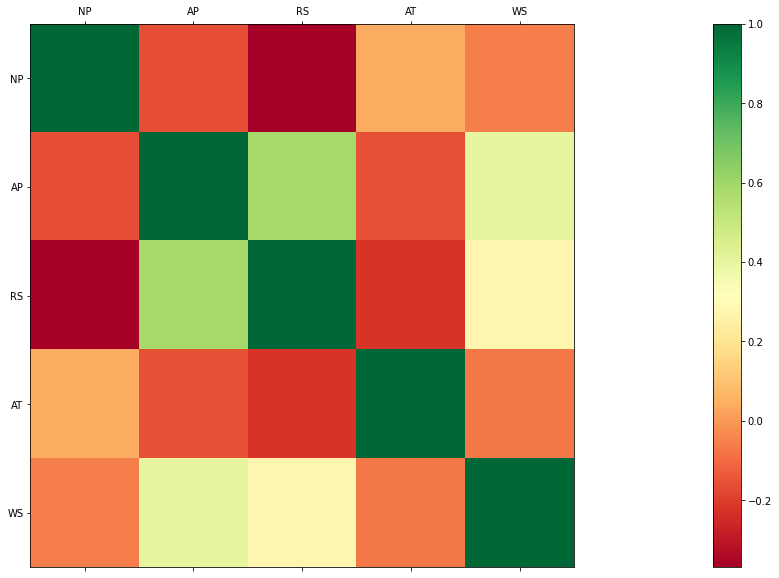

In [18]:
# Check the correlation between Active Power and the rest of the variables

# retrieve the correlation table
df_corr = df.corr()

# increase the size of the figure
fig = plt.figure(figsize=(50, 10))
ax = fig.add_subplot(111)

# set the color pallete (Red, yellow, green)
cax = ax.matshow(df_corr, cmap=plt.cm.RdYlGn)
fig.colorbar(cax)

# configure the labels
labels = [c for c in df_corr.columns]

# make sure to show all the labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

# Setting labels for the x and y axes of the correlation plot
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show(block=False)

In [19]:
# Renaming DataFrame column names from abbreviations back to their original full names

df.rename(
    columns={
        "RS": "Rotor Speed Value",
        "TS": "Turbine State",
        "AP": "Active Power Value",
        "NP": "Nacelle Position Value",
        "AT": "Air Temperature Value",
        "WS": "Wind Speed Value",
    },
    inplace=True,
)
df

Timestamp        Asset_Id  Nacelle Position Value  \
0      2019-01-01 00:00:00  cluster4.turb1                1.012412   
1      2019-01-01 00:05:00  cluster4.turb1                0.965929   
2      2019-01-01 00:10:00  cluster4.turb1                1.457590   
3      2019-01-01 00:15:00  cluster4.turb1               19.880070   
4      2019-01-01 00:20:00  cluster4.turb1               19.902333   
...                    ...             ...                     ...   
169925 2019-02-28 23:40:00  cluster4.turb9                0.469964   
169926 2019-02-28 23:45:00  cluster4.turb9                0.290671   
169927 2019-02-28 23:50:00  cluster4.turb9                0.024907   
169928 2019-02-28 23:55:00  cluster4.turb9                0.018215   
169929 2019-03-01 00:00:00  cluster4.turb9                0.011523   

        Active Power Value  Rotor Speed Value  Air Temperature Value  \
0               185.175430          15.222478              27.000000   
1               238.668051          15.265381              27.000000   
2                50.955101          15.030635              27.032310   
3                -9.630930           4.574535              28.000000   
4                -5.017763           3.804617              28.000000   
...                    ...                ...                    ...   
169925         1724.291762          15.512559              30.000000   
169926         1994.200975          15.584873              30.000000   
169927         1497.190226          15.441160              30.000000   
169928         1213.136675          15.376494              30.107405   
169929         1110.536889          15.350679              31.000000   

        Wind Speed Value Turbine State  
0               4.575610            OK  
1               5.358844            OK  
2               4.167476            OK  
3               5.149614            OK  
4               3.888050            OK  
...                  ...           ...  
169925         11.183036            OK  
169926         12.690223            OK  
169927         10.590018            OK  
169928          9.943234            OK  
169929          9.172513            OK  

[169930 rows x 8 columns]

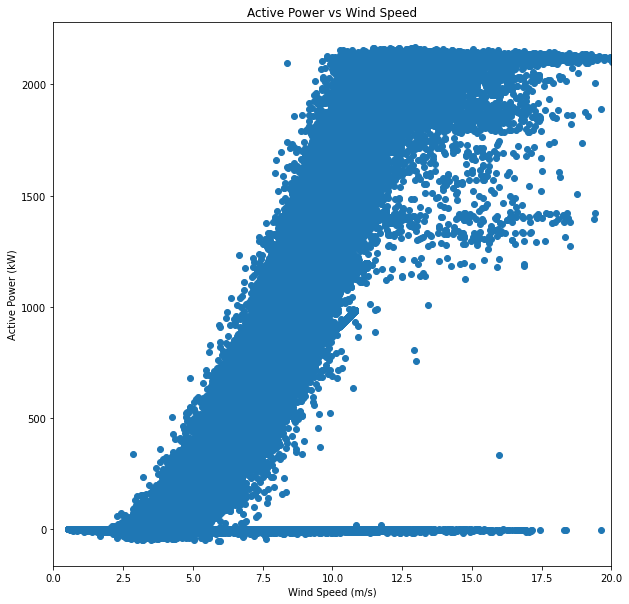

In [20]:
# Plotting Active Power versus Wind Speed

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(df["Wind Speed Value"], df["Active Power Value"])
ax.set_xlabel("Wind Speed (m/s)")
ax.set_ylabel("Active Power (kW)")
ax.set_title("Active Power vs Wind Speed")
ax.set_xlim([0,20])

plt.show(block=False)

In [21]:
df = df.dropna()
df

Timestamp        Asset_Id  Nacelle Position Value  \
0      2019-01-01 00:00:00  cluster4.turb1                1.012412   
1      2019-01-01 00:05:00  cluster4.turb1                0.965929   
2      2019-01-01 00:10:00  cluster4.turb1                1.457590   
3      2019-01-01 00:15:00  cluster4.turb1               19.880070   
4      2019-01-01 00:20:00  cluster4.turb1               19.902333   
...                    ...             ...                     ...   
169925 2019-02-28 23:40:00  cluster4.turb9                0.469964   
169926 2019-02-28 23:45:00  cluster4.turb9                0.290671   
169927 2019-02-28 23:50:00  cluster4.turb9                0.024907   
169928 2019-02-28 23:55:00  cluster4.turb9                0.018215   
169929 2019-03-01 00:00:00  cluster4.turb9                0.011523   

        Active Power Value  Rotor Speed Value  Air Temperature Value  \
0               185.175430          15.222478              27.000000   
1               238.668051          15.265381              27.000000   
2                50.955101          15.030635              27.032310   
3                -9.630930           4.574535              28.000000   
4                -5.017763           3.804617              28.000000   
...                    ...                ...                    ...   
169925         1724.291762          15.512559              30.000000   
169926         1994.200975          15.584873              30.000000   
169927         1497.190226          15.441160              30.000000   
169928         1213.136675          15.376494              30.107405   
169929         1110.536889          15.350679              31.000000   

        Wind Speed Value Turbine State  
0               4.575610            OK  
1               5.358844            OK  
2               4.167476            OK  
3               5.149614            OK  
4               3.888050            OK  
...                  ...           ...  
169925         11.183036            OK  
169926         12.690223            OK  
169927         10.590018            OK  
169928          9.943234            OK  
169929          9.172513            OK  

[169930 rows x 8 columns]

In [22]:
# df = df.dropna() #not needed
# Remove the GE05 turbine rows from the data frame because it has a lower rating relative to all the other turbines
# filterOutGE05 = df["Asset_Id"] != "GE05"
df_Filter = df  # [filterOutGE05]

In [23]:
# Filter out negative & excessive Active Power Values
filterNegativeActivePower = df_Filter["Active Power Value"] >= 0
df_Filter = df_Filter[filterNegativeActivePower]
df_Filter

Timestamp        Asset_Id  Nacelle Position Value  \
0      2019-01-01 00:00:00  cluster4.turb1                1.012412   
1      2019-01-01 00:05:00  cluster4.turb1                0.965929   
2      2019-01-01 00:10:00  cluster4.turb1                1.457590   
53     2019-01-01 04:25:00  cluster4.turb1                0.437358   
54     2019-01-01 04:30:00  cluster4.turb1                0.168243   
...                    ...             ...                     ...   
169925 2019-02-28 23:40:00  cluster4.turb9                0.469964   
169926 2019-02-28 23:45:00  cluster4.turb9                0.290671   
169927 2019-02-28 23:50:00  cluster4.turb9                0.024907   
169928 2019-02-28 23:55:00  cluster4.turb9                0.018215   
169929 2019-03-01 00:00:00  cluster4.turb9                0.011523   

        Active Power Value  Rotor Speed Value  Air Temperature Value  \
0               185.175430          15.222478              27.000000   
1               238.668051          15.265381              27.000000   
2                50.955101          15.030635              27.032310   
53              402.236256          15.032705              32.158949   
54              588.532732          15.293560              32.494196   
...                    ...                ...                    ...   
169925         1724.291762          15.512559              30.000000   
169926         1994.200975          15.584873              30.000000   
169927         1497.190226          15.441160              30.000000   
169928         1213.136675          15.376494              30.107405   
169929         1110.536889          15.350679              31.000000   

        Wind Speed Value Turbine State  
0               4.575610            OK  
1               5.358844            OK  
2               4.167476            OK  
53              6.400139            OK  
54              8.944748            OK  
...                  ...           ...  
169925         11.183036            OK  
169926         12.690223            OK  
169927         10.590018            OK  
169928          9.943234            OK  
169929          9.172513            OK  

[138927 rows x 8 columns]

In [24]:
# Remove the rows where we have a high wind speed and low active power in order to keep only the normal operating conditions
filterOutLowPowerHighWindSpeedData = ~(
    (df_Filter["Wind Speed Value"] > 10) & (df_Filter["Active Power Value"] < 600)
)
df_Filter = df_Filter[filterOutLowPowerHighWindSpeedData]

In [25]:
df_Filter

Timestamp        Asset_Id  Nacelle Position Value  \
0      2019-01-01 00:00:00  cluster4.turb1                1.012412   
1      2019-01-01 00:05:00  cluster4.turb1                0.965929   
2      2019-01-01 00:10:00  cluster4.turb1                1.457590   
53     2019-01-01 04:25:00  cluster4.turb1                0.437358   
54     2019-01-01 04:30:00  cluster4.turb1                0.168243   
...                    ...             ...                     ...   
169925 2019-02-28 23:40:00  cluster4.turb9                0.469964   
169926 2019-02-28 23:45:00  cluster4.turb9                0.290671   
169927 2019-02-28 23:50:00  cluster4.turb9                0.024907   
169928 2019-02-28 23:55:00  cluster4.turb9                0.018215   
169929 2019-03-01 00:00:00  cluster4.turb9                0.011523   

        Active Power Value  Rotor Speed Value  Air Temperature Value  \
0               185.175430          15.222478              27.000000   
1               238.668051          15.265381              27.000000   
2                50.955101          15.030635              27.032310   
53              402.236256          15.032705              32.158949   
54              588.532732          15.293560              32.494196   
...                    ...                ...                    ...   
169925         1724.291762          15.512559              30.000000   
169926         1994.200975          15.584873              30.000000   
169927         1497.190226          15.441160              30.000000   
169928         1213.136675          15.376494              30.107405   
169929         1110.536889          15.350679              31.000000   

        Wind Speed Value Turbine State  
0               4.575610            OK  
1               5.358844            OK  
2               4.167476            OK  
53              6.400139            OK  
54              8.944748            OK  
...                  ...           ...  
169925         11.183036            OK  
169926         12.690223            OK  
169927         10.590018            OK  
169928          9.943234            OK  
169929          9.172513            OK  

[138917 rows x 8 columns]

In [26]:
# Keep only the rows which correspond to the "Load Operation" state
filterLoadOperationState = df_Filter["Turbine State"] == "OK"  # 0 
df_Filter = df_Filter[filterLoadOperationState]

In [27]:
df_Filter

Timestamp        Asset_Id  Nacelle Position Value  \
0      2019-01-01 00:00:00  cluster4.turb1                1.012412   
1      2019-01-01 00:05:00  cluster4.turb1                0.965929   
2      2019-01-01 00:10:00  cluster4.turb1                1.457590   
53     2019-01-01 04:25:00  cluster4.turb1                0.437358   
54     2019-01-01 04:30:00  cluster4.turb1                0.168243   
...                    ...             ...                     ...   
169925 2019-02-28 23:40:00  cluster4.turb9                0.469964   
169926 2019-02-28 23:45:00  cluster4.turb9                0.290671   
169927 2019-02-28 23:50:00  cluster4.turb9                0.024907   
169928 2019-02-28 23:55:00  cluster4.turb9                0.018215   
169929 2019-03-01 00:00:00  cluster4.turb9                0.011523   

        Active Power Value  Rotor Speed Value  Air Temperature Value  \
0               185.175430          15.222478              27.000000   
1               238.668051          15.265381              27.000000   
2                50.955101          15.030635              27.032310   
53              402.236256          15.032705              32.158949   
54              588.532732          15.293560              32.494196   
...                    ...                ...                    ...   
169925         1724.291762          15.512559              30.000000   
169926         1994.200975          15.584873              30.000000   
169927         1497.190226          15.441160              30.000000   
169928         1213.136675          15.376494              30.107405   
169929         1110.536889          15.350679              31.000000   

        Wind Speed Value Turbine State  
0               4.575610            OK  
1               5.358844            OK  
2               4.167476            OK  
53              6.400139            OK  
54              8.944748            OK  
...                  ...           ...  
169925         11.183036            OK  
169926         12.690223            OK  
169927         10.590018            OK  
169928          9.943234            OK  
169929          9.172513            OK  

[138568 rows x 8 columns]

In [28]:
# Filter out high Wind Speeds (> 13 m/s) that do not change the Active Power results
filterOutHighWind = df_Filter["Wind Speed Value"] < 13
df_Filter = df_Filter[filterOutHighWind]

In [29]:
df_Filter

Timestamp        Asset_Id  Nacelle Position Value  \
0      2019-01-01 00:00:00  cluster4.turb1                1.012412   
1      2019-01-01 00:05:00  cluster4.turb1                0.965929   
2      2019-01-01 00:10:00  cluster4.turb1                1.457590   
53     2019-01-01 04:25:00  cluster4.turb1                0.437358   
54     2019-01-01 04:30:00  cluster4.turb1                0.168243   
...                    ...             ...                     ...   
169925 2019-02-28 23:40:00  cluster4.turb9                0.469964   
169926 2019-02-28 23:45:00  cluster4.turb9                0.290671   
169927 2019-02-28 23:50:00  cluster4.turb9                0.024907   
169928 2019-02-28 23:55:00  cluster4.turb9                0.018215   
169929 2019-03-01 00:00:00  cluster4.turb9                0.011523   

        Active Power Value  Rotor Speed Value  Air Temperature Value  \
0               185.175430          15.222478              27.000000   
1               238.668051          15.265381              27.000000   
2                50.955101          15.030635              27.032310   
53              402.236256          15.032705              32.158949   
54              588.532732          15.293560              32.494196   
...                    ...                ...                    ...   
169925         1724.291762          15.512559              30.000000   
169926         1994.200975          15.584873              30.000000   
169927         1497.190226          15.441160              30.000000   
169928         1213.136675          15.376494              30.107405   
169929         1110.536889          15.350679              31.000000   

        Wind Speed Value Turbine State  
0               4.575610            OK  
1               5.358844            OK  
2               4.167476            OK  
53              6.400139            OK  
54              8.944748            OK  
...                  ...           ...  
169925         11.183036            OK  
169926         12.690223            OK  
169927         10.590018            OK  
169928          9.943234            OK  
169929          9.172513            OK  

[128144 rows x 8 columns]

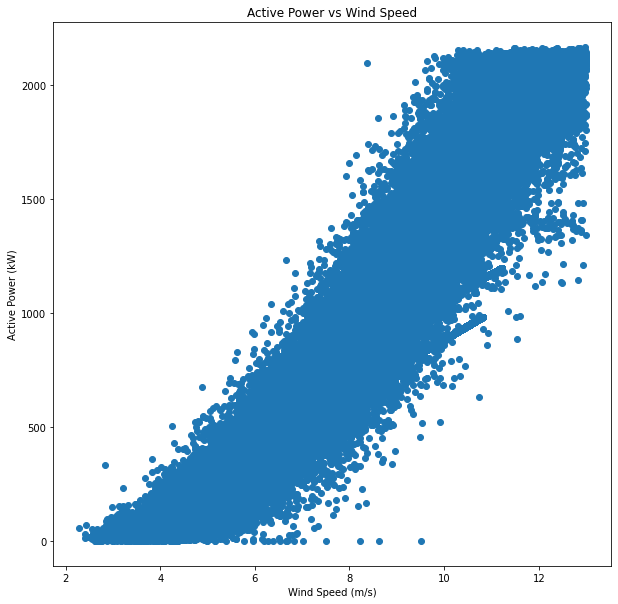

In [30]:
# Plotting Active Power versus Wind Speed - filtered data frame representing Normal Operating Conditions

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(df_Filter["Wind Speed Value"], df_Filter["Active Power Value"])
ax.set_xlabel("Wind Speed (m/s)")
ax.set_ylabel("Active Power (kW)")
ax.set_title("Active Power vs Wind Speed")

plt.show(block=False)

In [31]:
# Prepare the training & testing/scoring data sets, and split them randomly
from sklearn.model_selection import train_test_split

# define the target variable to be predicted
y = df_Filter["Active Power Value"].values
# split the dataset randomly into test and train sets
X_train, X_test, y_train, y_test = train_test_split(
    df_Filter[["Air Temperature Value", "Wind Speed Value"]].values,
    y,
    test_size=0.25,
    random_state=42,
)

In [32]:
# Use the Decision Tree Regression Machine Learning model from scikit-learn
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

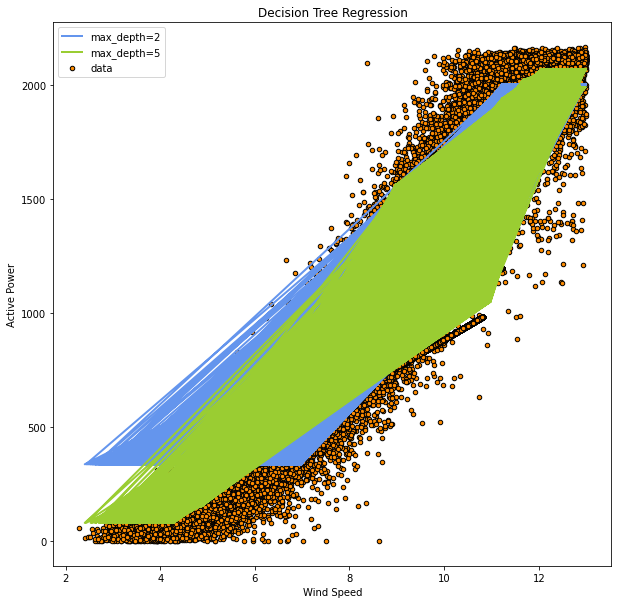

In [33]:
# Plot the results
plt.figure(figsize=(10, 10))
plt.scatter(
    X_train[:, 1], y_train, s=20, edgecolor="black", c="darkorange", label="data"
)
plt.plot(X_test[:, 1], y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test[:, 1], y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Wind Speed")
plt.ylabel("Active Power")
plt.title("Decision Tree Regression")
plt.legend()
plt.show(block=False)

In [34]:
# save the machine learning model to disk
import pickle

filename = "WT_ActivePower_model.sav"
pickle.dump(regr_2, open(filename, "wb"))

In [35]:
# Test the model with the scoring/testing data set
loaded_model = pickle.load(open(filename, "rb"))
global result
result = loaded_model.score(X_test, y_test)
# print the model score
print(result)

0.9070587875345628


In [36]:
# Sample prediction
# define input
new_input = [[45, 6.6]]  # Temp=45 F, Wind Speed = 6.6 m/s
# get prediction for new input
new_output = regr_2.predict(new_input)
print(new_output)

[496.01194143]


In [37]:
# Call the OpenWeather API to retrieve the forecasted air temperature and wind speed
# for Jamestown, Australia for the next 5 days

url = "https://api.openweathermap.org/data/2.5/forecast?q=Jamestown,Australia&APPID=5dac981ce33f41f61d8d1ea06ee89798"
responseWeatherForecast = requests.get(url)

In [38]:
# Uncomment next line to see content (too big for notebook preview)
# responseWeatherForecast.json()

In [39]:
# Store the forecasted air temperature, wind speed and timestamp from the API json response in a pandas DataFrame

from decimal import Decimal
import datetime

TempArray = []
WindSpeedArray = []
TimestampArray = []

for val in responseWeatherForecast.json()["list"]:
    tempKelvin = val["main"]["temp"]
    tempF = round(((tempKelvin - 273.15) * (9 / 5)) + 32, 2)
    windSpeedMeterPerSec = round(val["wind"]["speed"], 2)
    np.array(TempArray.append(tempF))
    np.array(WindSpeedArray.append(windSpeedMeterPerSec))
    np.array(
        TimestampArray.append(
            datetime.datetime.strptime(val["dt_txt"], "%Y-%m-%d %H:%M:%S")
        )
    )

dfWeatherForecast = pd.DataFrame(
    {
        "Timestamp": TimestampArray,
        "Temp (F)": TempArray,
        "Wind Speed (m/s)": WindSpeedArray,
    }
)

dfWeatherForecast

Timestamp  Temp (F)  Wind Speed (m/s)
0  2021-06-18 00:00:00     68.54              1.37
1  2021-06-18 03:00:00     60.51              2.38
2  2021-06-18 06:00:00     53.42              3.30
3  2021-06-18 09:00:00     52.30              3.26
4  2021-06-18 12:00:00     60.12              4.45
5  2021-06-18 15:00:00     65.79              5.16
6  2021-06-18 18:00:00     68.61              5.34
7  2021-06-18 21:00:00     71.06              6.07
8  2021-06-19 00:00:00     66.16              4.60
9  2021-06-19 03:00:00     66.00              3.83
10 2021-06-19 06:00:00     65.79              3.46
11 2021-06-19 09:00:00     65.01              4.72
12 2021-06-19 12:00:00     66.00              4.94
13 2021-06-19 15:00:00     70.52              5.91
14 2021-06-19 18:00:00     67.98              5.57
15 2021-06-19 21:00:00     73.26              4.10
16 2021-06-20 00:00:00     67.44              2.18
17 2021-06-20 03:00:00     59.68              1.24
18 2021-06-20 06:00:00     57.99              1.22
19 2021-06-20 09:00:00     56.62              1.52
20 2021-06-20 12:00:00     63.10              1.70
21 2021-06-20 15:00:00     72.97              4.65
22 2021-06-20 18:00:00     76.26              5.53
23 2021-06-20 21:00:00     76.35              4.01
24 2021-06-21 00:00:00     70.09              1.38
25 2021-06-21 03:00:00     65.57              2.68
26 2021-06-21 06:00:00     65.84              2.79
27 2021-06-21 09:00:00     67.39              4.83
28 2021-06-21 12:00:00     70.65              5.59
29 2021-06-21 15:00:00     79.21              7.21
30 2021-06-21 18:00:00     82.00              7.57
31 2021-06-21 21:00:00     74.57              5.20
32 2021-06-22 00:00:00     65.50              3.11
33 2021-06-22 03:00:00     60.06              3.00
34 2021-06-22 06:00:00     57.69              1.17
35 2021-06-22 09:00:00     57.13              1.87
36 2021-06-22 12:00:00     52.20              3.29
37 2021-06-22 15:00:00     50.23              3.85
38 2021-06-22 18:00:00     49.59              3.13
39 2021-06-22 21:00:00     55.96              7.29

In [40]:
# Use the machine learning model developed previously to predict the Active Power
# and add the values to the existing Data Frame

import pickle

filename = "WT_ActivePower_model.sav"
loaded_model = pickle.load(open(filename, "rb"))

PredictedPowerArray = []

for index, row in dfWeatherForecast.iterrows():
    new_input = [[row["Temp (F)"], row["Wind Speed (m/s)"]]]
    result = loaded_model.predict(new_input)
    np.array(PredictedPowerArray.append(result))

dfWeatherForecast["Predicted Active Power (kW)"] = pd.DataFrame(PredictedPowerArray)

dfWeatherForecast

Timestamp  Temp (F)  Wind Speed (m/s)  \
0  2021-06-18 00:00:00     68.54              1.37   
1  2021-06-18 03:00:00     60.51              2.38   
2  2021-06-18 06:00:00     53.42              3.30   
3  2021-06-18 09:00:00     52.30              3.26   
4  2021-06-18 12:00:00     60.12              4.45   
5  2021-06-18 15:00:00     65.79              5.16   
6  2021-06-18 18:00:00     68.61              5.34   
7  2021-06-18 21:00:00     71.06              6.07   
8  2021-06-19 00:00:00     66.16              4.60   
9  2021-06-19 03:00:00     66.00              3.83   
10 2021-06-19 06:00:00     65.79              3.46   
11 2021-06-19 09:00:00     65.01              4.72   
12 2021-06-19 12:00:00     66.00              4.94   
13 2021-06-19 15:00:00     70.52              5.91   
14 2021-06-19 18:00:00     67.98              5.57   
15 2021-06-19 21:00:00     73.26              4.10   
16 2021-06-20 00:00:00     67.44              2.18   
17 2021-06-20 03:00:00     59.68              1.24   
18 2021-06-20 06:00:00     57.99              1.22   
19 2021-06-20 09:00:00     56.62              1.52   
20 2021-06-20 12:00:00     63.10              1.70   
21 2021-06-20 15:00:00     72.97              4.65   
22 2021-06-20 18:00:00     76.26              5.53   
23 2021-06-20 21:00:00     76.35              4.01   
24 2021-06-21 00:00:00     70.09              1.38   
25 2021-06-21 03:00:00     65.57              2.68   
26 2021-06-21 06:00:00     65.84              2.79   
27 2021-06-21 09:00:00     67.39              4.83   
28 2021-06-21 12:00:00     70.65              5.59   
29 2021-06-21 15:00:00     79.21              7.21   
30 2021-06-21 18:00:00     82.00              7.57   
31 2021-06-21 21:00:00     74.57              5.20   
32 2021-06-22 00:00:00     65.50              3.11   
33 2021-06-22 03:00:00     60.06              3.00   
34 2021-06-22 06:00:00     57.69              1.17   
35 2021-06-22 09:00:00     57.13              1.87   
36 2021-06-22 12:00:00     52.20              3.29   
37 2021-06-22 15:00:00     50.23              3.85   
38 2021-06-22 18:00:00     49.59              3.13   
39 2021-06-22 21:00:00     55.96              7.29   

    Predicted Active Power (kW)  
0                     79.944681  
1                     79.944681  
2                     79.944681  
3                     79.944681  
4                    153.130451  
5                    221.797642  
6                    295.246174  
7                    416.956732  
8                    153.130451  
9                     79.944681  
10                    79.944681  
11                   153.130451  
12                   221.797642  
13                   359.545720  
14                   295.246174  
15                    79.944681  
16                    79.944681  
17                    79.944681  
18                    79.944681  
19                    79.944681  
20                    79.944681  
21                   153.130451  
22                   295.246174  
23                    79.944681  
24                    79.944681  
25                    79.944681  
26                    79.944681  
27                   153.130451  
28                   295.246174  
29                   592.149992  
30                   702.385380  
31                   221.797642  
32                    79.944681  
33                    79.944681  
34                    79.944681  
35                    79.944681  
36                    79.944681  
37                    79.944681  
38                    79.944681  
39                   592.149992

In [41]:
import plotly.express as px

px.scatter_3d(
    dfWeatherForecast,
    x="Temp (F)",
    y="Wind Speed (m/s)",
    z="Predicted Active Power (kW)",
    size="Predicted Active Power (kW)",
    color="Predicted Active Power (kW)",
    log_x=False,
    size_max=100,
    range_x=[0, 90],
    range_y=[0, 12],
)